In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

from PIL import Image
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
parasite_files=os.listdir('/kaggle/input/files1/Malaria Cells/testing_set/Parasitized')

print(parasite_files[0:5])
print(parasite_files[-5:])

['C99P60ThinF_IMG_20150918_141001_cell_93.png', 'C99P60ThinF_IMG_20150918_141001_cell_133.png', 'C101P62ThinF_IMG_20150918_151942_cell_60.png', 'C52P13thinF_IMG_20150725_124830_cell_174.png', 'C48P9thinF_IMG_20150721_161243_cell_157.png']
['C118P79ThinF_IMG_20151002_105018_cell_135.png', 'C89P50ThinF_IMG_20150820_162504_cell_193.png', 'C118P79ThinF_IMG_20151002_105125_cell_156.png', 'C116P77ThinF_IMG_20150930_171844_cell_85.png', 'C91P52ThinF_IMG_20150821_124937_cell_189.png']


In [3]:
uninfected_files=os.listdir('/kaggle/input/files1/Malaria Cells/testing_set/Uninfected')

print(uninfected_files[0:5])
print(uninfected_files[-5:])

['C119P80ThinF_IMG_20151002_124304_cell_112.png', 'C101P62ThinF_IMG_20150918_151149_cell_63.png', 'C180P141NThinF_IMG_20151201_165601_cell_115.png', 'C95P56ThinF_IMG_20150821_171603_cell_75.png', 'C125P86ThinF_IMG_20151004_102053_cell_83.png']
['C143P104ThinF_IMG_20151005_225623_cell_15.png', 'C108P69ThinF_IMG_20150924_224616_cell_193.png', 'C151P112ThinF_IMG_20151115_121942_cell_217.png', 'C74P35_ThinF_IMG_20150815_113951_cell_85.png', 'C181P142ThinF_IMG_20151127_160539_cell_2.png']


In [4]:
print('number of parasite images is: ', len(parasite_files))
print('number of Uninfected images is: ', len(uninfected_files))

number of parasite images is:  7952
number of Uninfected images is:  7880


### Creating Labels

0 --> uninfected
1 --> parasite

In [5]:
parasite_labels=[1]* 7952
uninfected_labels=[0]* 7880

In [6]:
print('With parasite labels: ', parasite_labels[0:5])
print('Without uninfected labels: ', uninfected_labels[0:5])

With parasite labels:  [1, 1, 1, 1, 1]
Without uninfected labels:  [0, 0, 0, 0, 0]


In [7]:
print(len(parasite_labels))
print(len(uninfected_labels))

7952
7880


**Combining both into a single column name labels**

In [8]:
labels=parasite_labels + uninfected_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

15832
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying the images

#### Parasite image sample

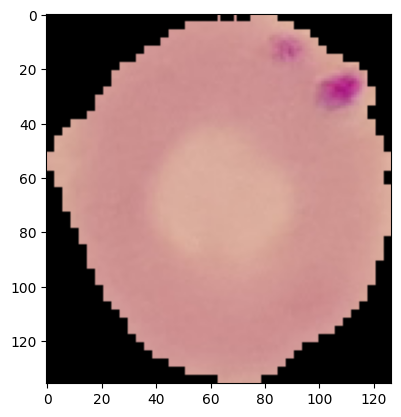

In [9]:
img=mpimg.imread('/kaggle/input/files1/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_145042_cell_164.png')
plt.imshow(img)

plt.show()

#### Uninfected image samples

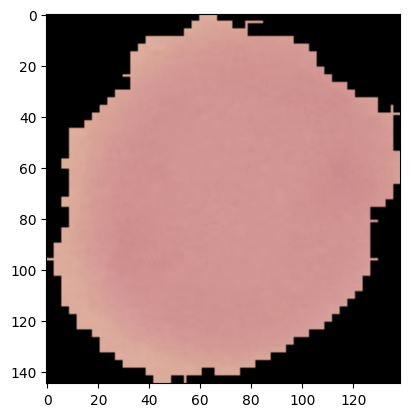

In [10]:
img=mpimg.imread('/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C100P61ThinF_IMG_20150918_145609_cell_113.png')

plt.imshow(img)
plt.show()

## Image processing

- Resize the Images

- Convert the images to numpy arrays

In [11]:
parasite_path=('/kaggle/input/files1/Malaria Cells/testing_set/Parasitized/')
data=[]

for img_file in parasite_files:
    image=Image.open(parasite_path +img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)


uninfected_path=('/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/')


for img_file in uninfected_files:
    image=Image.open(uninfected_path +img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [12]:
type(data)

list

In [13]:
len(data)

15832

In [14]:
# Checking the first image
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

**converting image list and label list to numpy arrays**

In [17]:
X=np.array(data)
Y=np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
type(Y)

numpy.ndarray

In [20]:
print(X.shape)
print(Y.shape)

(15832, 128, 128, 3)
(15832,)


### Train Test Split

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(15832, 128, 128, 3) (12665, 128, 128, 3) (3167, 128, 128, 3)


### Scaling the data

In [37]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [38]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [39]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Model training

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [69]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, verbose=1, epochs=5)

Epoch 1/5
357/357 [==============================] - 6s 18ms/step - loss: 0.1196 - acc: 0.9612 - val_loss: 0.2865 - val_acc: 0.9195
Epoch 2/5
357/357 [==============================] - 5s 15ms/step - loss: 0.1114 - acc: 0.9662 - val_loss: 0.2328 - val_acc: 0.9195
Epoch 3/5
357/357 [==============================] - 6s 15ms/step - loss: 0.0881 - acc: 0.9711 - val_loss: 0.2813 - val_acc: 0.9219
Epoch 4/5
357/357 [==============================] - 6s 15ms/step - loss: 0.0743 - acc: 0.9763 - val_loss: 0.3389 - val_acc: 0.9274
Epoch 5/5
357/357 [==============================] - 5s 15ms/step - loss: 0.0577 - acc: 0.9814 - val_loss: 0.4541 - val_acc: 0.9124


In [70]:
loss, accuracy=model.evaluate(X_test_scaled, Y_test)

99/99 [==============================] - 1s 7ms/step - loss: 0.3839 - acc: 0.9286


In [51]:
y_pred=model.predict(X_test_scaled)

99/99 [==============================] - 1s 6ms/step


In [63]:
np.argmax(y_pred[255])

1

In [61]:
Y_test[255]

1

### Visualization

Loss

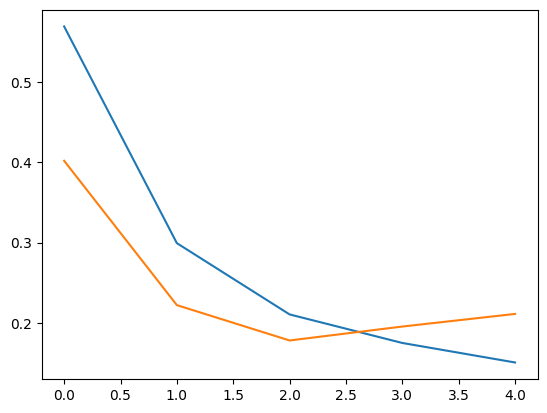

In [45]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')

Accueacy

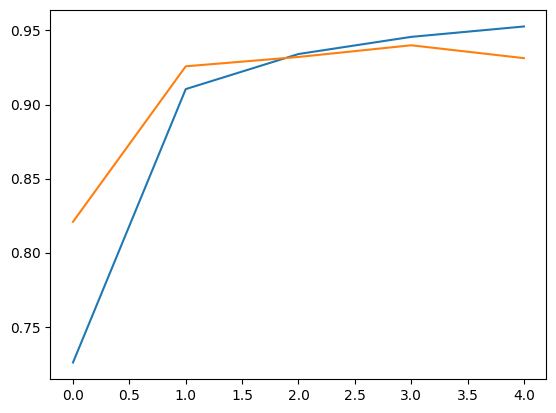

In [46]:
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='validation_acc')

## Prediction

#### Test case 1 

Path of the image to be predicted:  /kaggle/input/files1/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144823_cell_127.png


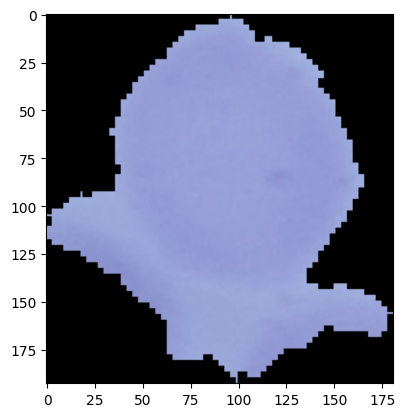

1/1 [==============================] - 0s 21ms/step
Prediction Probabilities: [[9.9954093e-01 3.4072253e-04]]
Not Malaria


In [82]:
import matplotlib.image as mpimg
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already loaded your model
# model = load_model('your_model.h5')

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

# Ensure the shape matches the expected input shape of your model
input_image_resized = cv2.resize(input_image, (128, 128))

# Normalize the pixel values
input_image_normalized = input_image_resized / 255.0

# Reshape for model prediction
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))

# Make predictions
input_prediction = model.predict(input_image_reshaped)

# Display the prediction probabilities
print("Prediction Probabilities:", input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Display the predicted label
if input_pred_label == 1:
    print('Malaria')
else:
    print('Not Malaria')

#### Test case 2

Path of the image to be predicted:  /kaggle/input/files1/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png


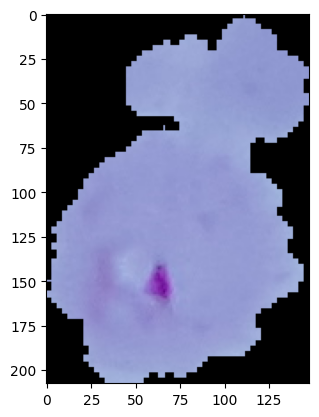

1/1 [==============================] - 0s 21ms/step
Prediction Probabilities: [[0.04632625 0.9509095 ]]
Malaria


In [84]:
import matplotlib.image as mpimg
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_normalized = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))
input_prediction = model.predict(input_image_reshaped)
print("Prediction Probabilities:", input_prediction)
input_pred_label = np.argmax(input_prediction)
if input_pred_label == 1:
    print('Malaria')
else:
    print('Not Malaria')